# GDP Forecasting Using RF model

In this project we aim to Predict GDP of a country.
Data has been taken from Kaggle and it consists of 227 countries.
Link to data - Fernando Lasso: https://www.kaggle.com/fernandol/countries-of-the-world

Data has been cleaned and organised before using it for modeling using various methods.
This project achieves a maximum accuracy of 54% using GBD

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

## Data Import

In [2]:
data = pd.read_csv('countries of the world.csv')
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## Data Description

##### Data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

We need to change the type from 'object' to 'float' for our analysis.
<br> <br>
We shorten the column names so that they are more readable.

##### Fix column names

Changing long column names to short ones.

In [4]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

##### Fix data types

In [5]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

Checking the format now-

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

##### Seeing if there are missing datapoints

In [7]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


Checking using a heatmap

[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

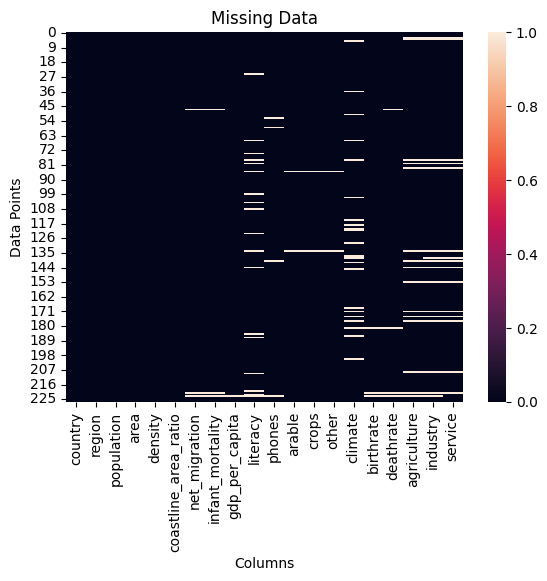

In [8]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

We can see from above that we have some missing data points, but it is not extensive. 14/20 of our columns have missing data points, the maximum percentage of missing data is in the 'Climate' column, and it is less than 10% (22/227).


##### Invistigating undefined features

Now we analyse what Climate, agriculture, industry, and service columns refer to-

In [9]:
data.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


We can see that (agriculture+industry+service)*100=1 which means they are representing percentage

Analysing Climate-

In [10]:
data.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [11]:
h1 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = data.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = data.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


So, along with nan (representing missing data), climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. our observations:

1. Countries with mostly desert/hot climate have 1
2. Countries with mostly tropical climate have 2
3. Countries with mostly cold/cool Climate have 3
4. Countries with Climate almost equally divided between hot and tropical have 1.5
5. Countries with Climate almost equally divided between cold and tropical have 2.5
6. Countries under 'Climate' = 4, are also belonging to cold/cool climate group; It is not metioned in the dataset source why this group is separate from group 3 ; yet we will compine both groups together in the data cleaning section of the project.
7. There are 22 countries with null values for the climate column, those will be replaces by 0 in a later step, where 0 will represent 'unknown' value.

## Data Cleaning

##### Missing Data

In [12]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


1. net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
2. infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
3. gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set. 
4. literacy: 18 missing values, replaces by the mean literacy of each missing value's region.
5. phones: 4 missing values, replaces by the mean phones of each missing value's region.
6. arable, crops, and other: 2 missing values of very small islands, replace with zero.
7. climate: 22 missing, replace with 0, where zero will represent a 'unknown' value. 
8. birthrate, and deathrate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related. 
9. agricultue, industry, and service: 15 missing values, all belong to very small island nations. After inspection for similar nations, we found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with tthe following: agricultue = 0.15, industry = 0.05. service = 0.8. 

In [13]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

Checking if the data has been successfully added or not.

In [14]:
print(data.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


No missing data anymore.

## EDA

##### Correlation heatmap

C:\Users\Vishal Rajput\AppData\Local\Temp\ipykernel_29072\2774579622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm').set(


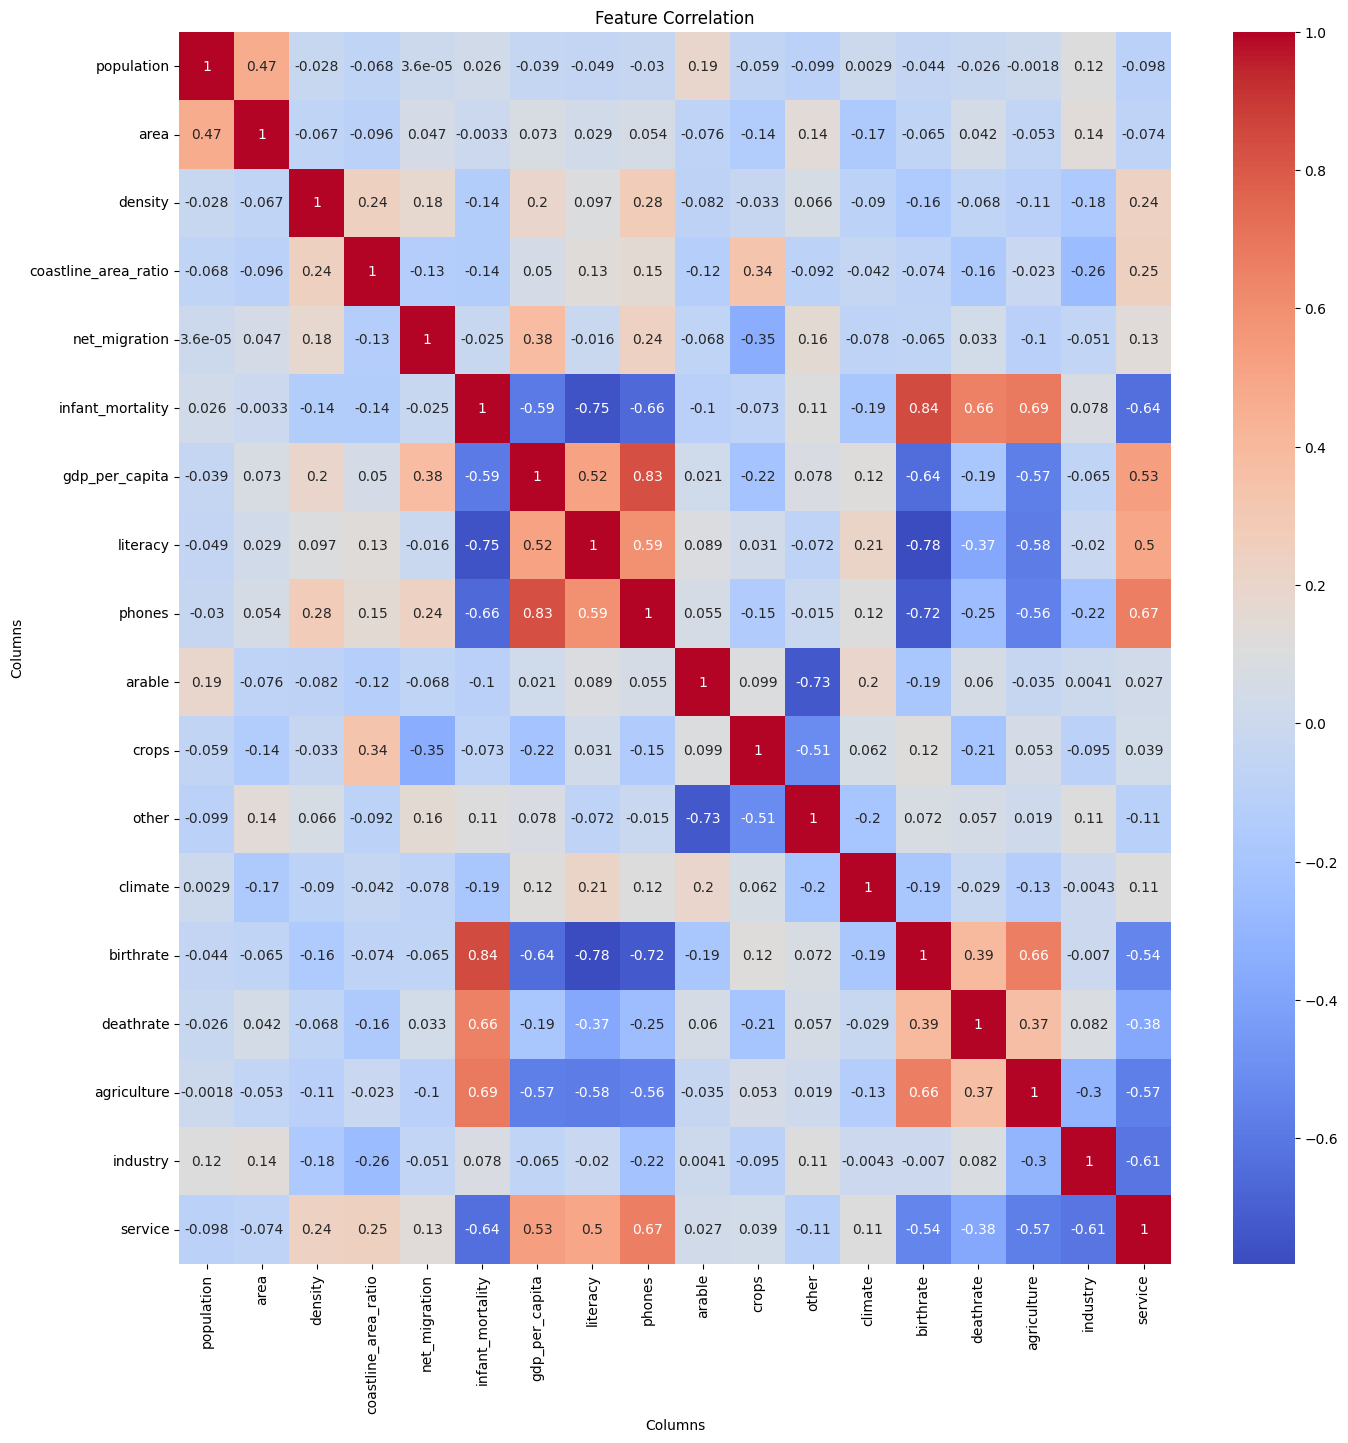

In [15]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from the above correlation heatmap: 
1. expected stronge correlation between infant_mortality and birthrate
2. unexpected stronge correlation between infant_mortality and agriculture
3. expected stronge correlation between infant_mortality and literacy
4. expected stronge correlation between gdp_per_capita and phones
5. expected stronge correlation between arable and other (other than crops) 
6. expected stronge correlation between birthrate and literacy (the less literacy the higher the birthrate) 
7. unexpected stronge correlation between birthrate and phones

let's now show correlation among a few of our features

We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita.

##### Regional Analysis

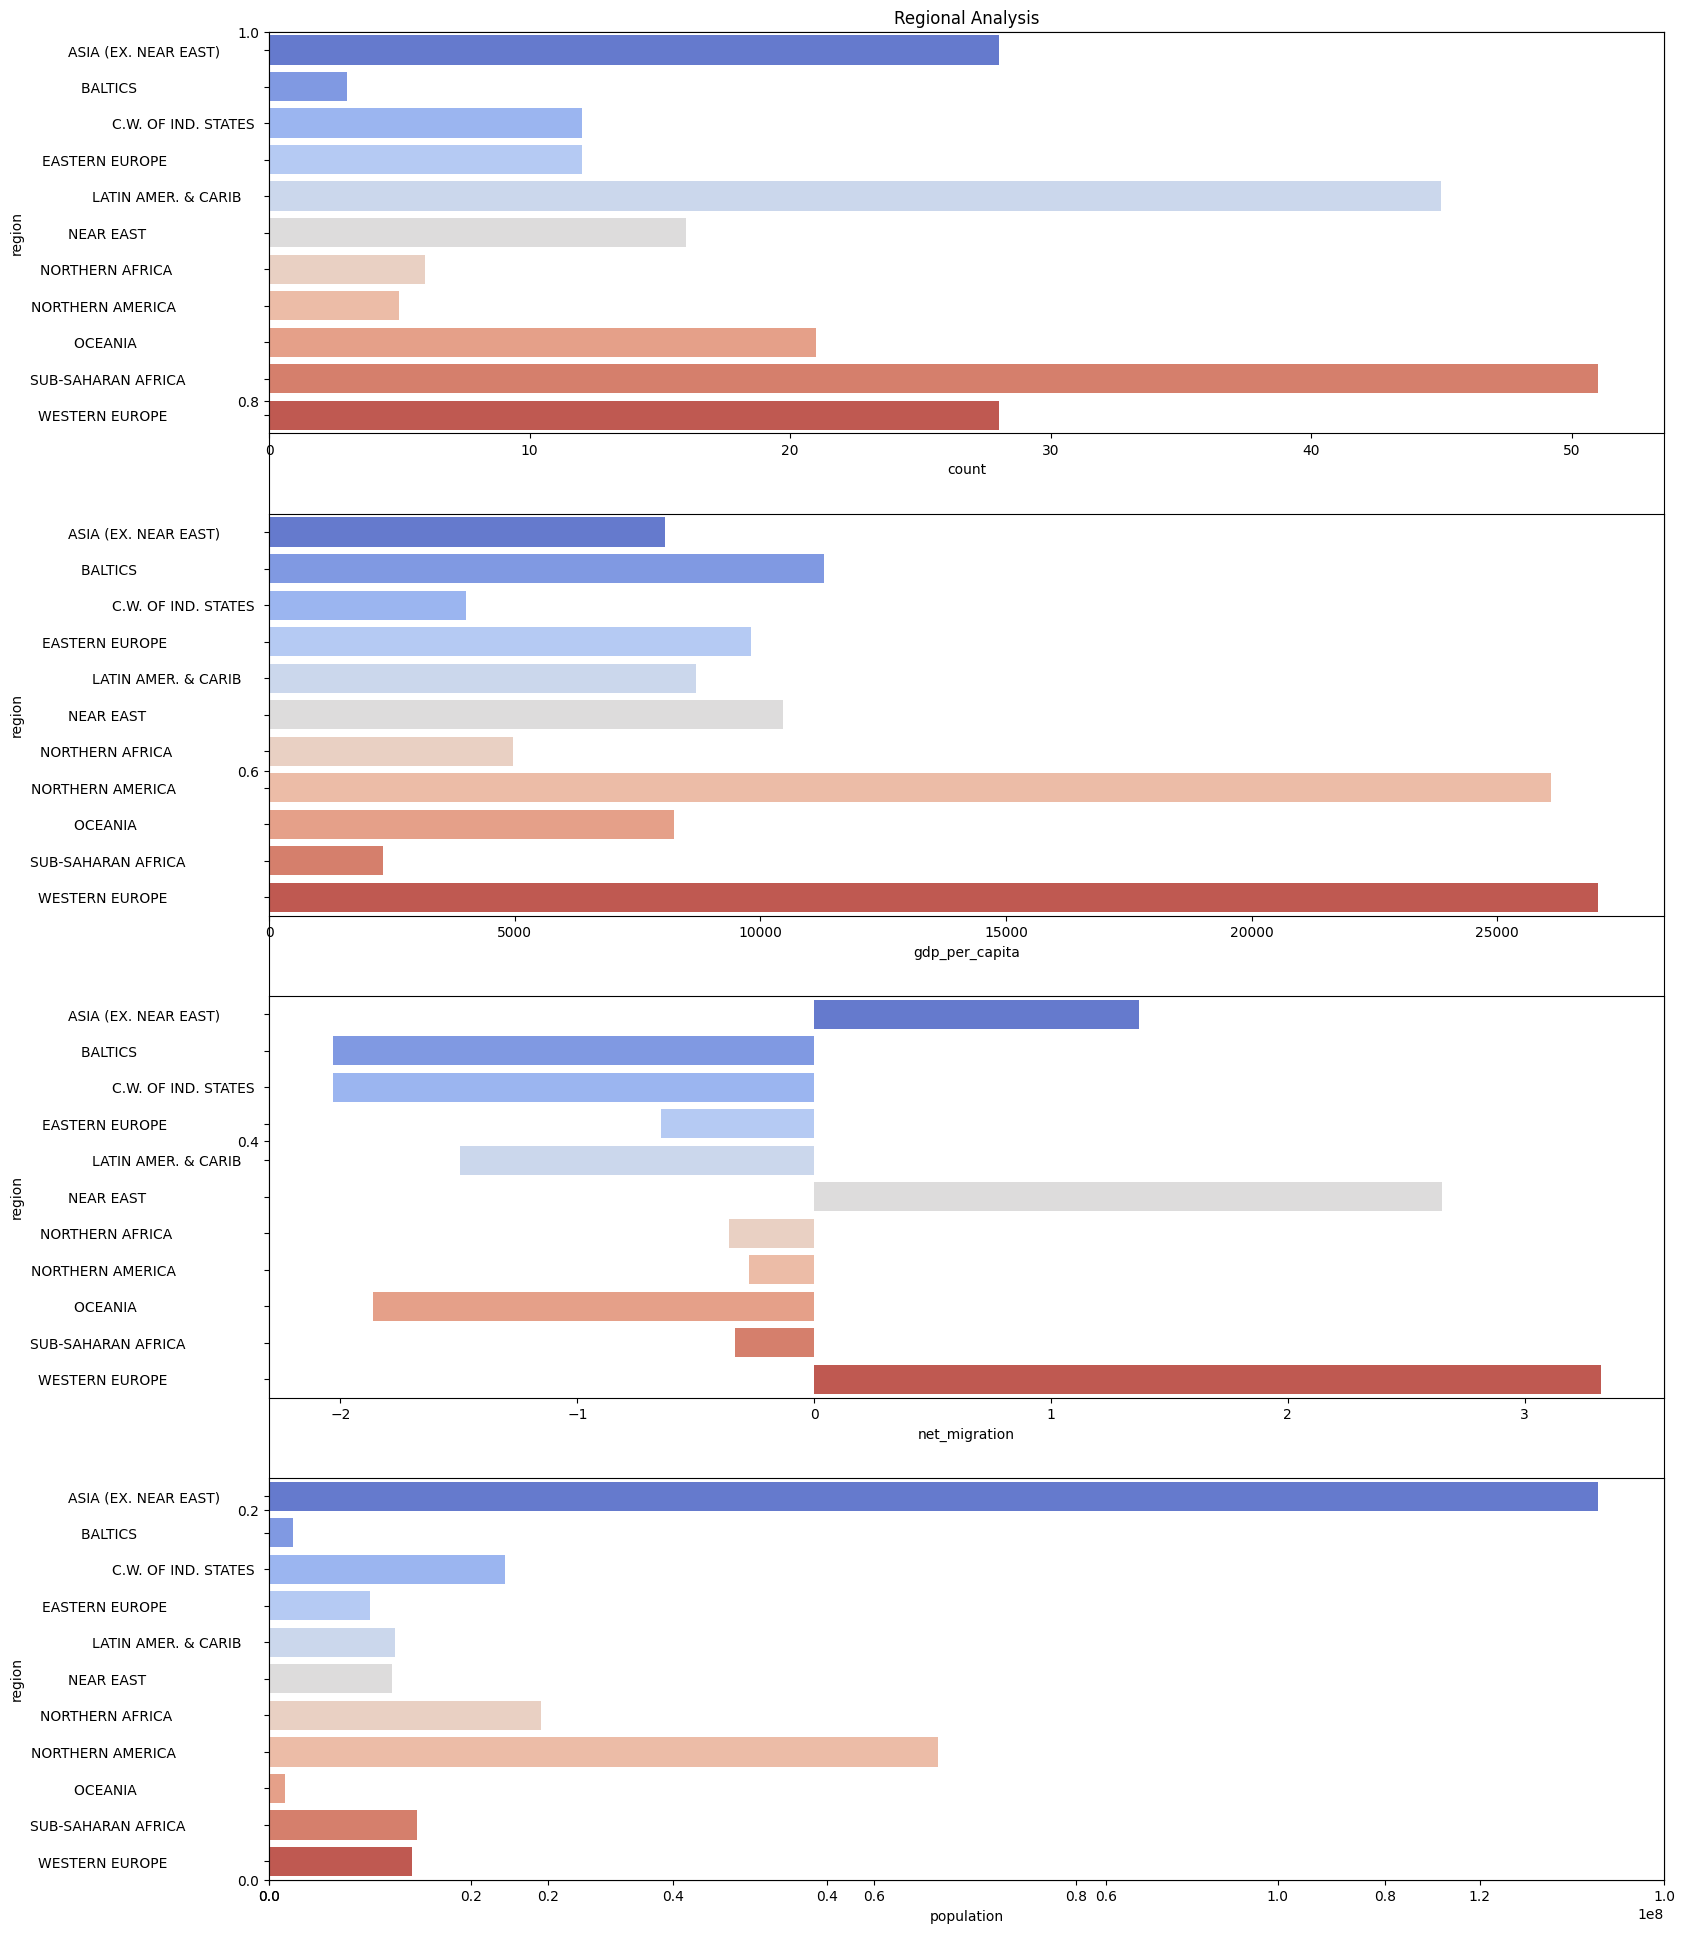

In [16]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1, palette='coolwarm')
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='coolwarm', errorbar= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, palette='coolwarm', errorbar= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, palette='coolwarm', errorbar= None)
plt.show()

From the above figures, we can notice the following: 

1. Sub-Saharian Africa and Latin America regions have the most countries whithen them. 
2. Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
3. Asia, North America, and North Europe, are the main regions where migrants from other regions go. 
4. Asia has the largest population, Oceania has the smallest. 

##### GDP Analysis

The figure below shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

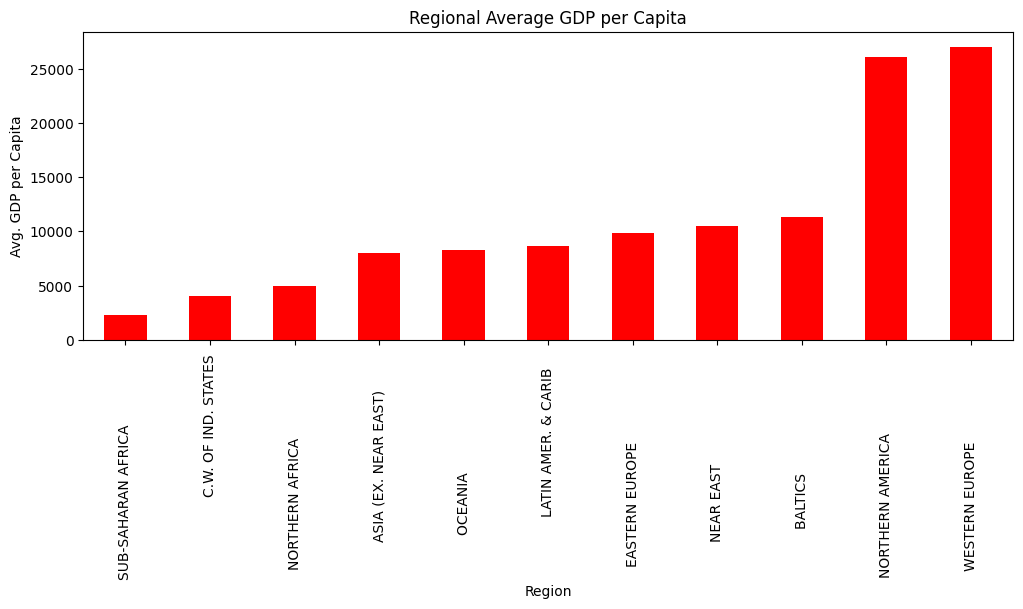

In [17]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

## Data Pre-Conditioning

In this section we will make our data ready for model training. This will include: 
1. Transform 'region' column into numerical values. 
2. Split data set into training and testing parts (80/20), while dropping the countries column (string, and not going to be used to train the models), and separating gdp_per_capita column, where it will be used as labels. 
3. We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

##### Region Transform

In [18]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis=1).drop(['region'],axis=1)
print(data_final.info())
data_final


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,...,0,0,0,0,1,0,0,0,0,0
223,Western Sahara,273008,266000,1.0,0.42,0.00,0.00,2500.0,67.240000,100.2,...,0,0,0,0,0,1,0,0,0,0
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,...,0,0,0,0,1,0,0,0,0,0
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,...,0,0,0,0,0,0,0,0,1,0


In [19]:
data_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


##### Data Split 1: all of our final dataset, no scaling

In [20]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [21]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

We will select only a portion of our features, the ones with coreelation score larger than -/+ 0.3 with gdp_per_capita.  

In [22]:
y3 = y
X3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

##### Data Split 4: feature selected dataset, with scaling

In [23]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test


## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

##### Model Training

In [24]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

##### Predictions

In [25]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

##### Evaluation

Linear Regression Performance:

all features, No scaling:
MAE: 330350.85866013577
RMSE: 1570337.5456389904
R2_Score:  -29843.120383349895

all features, with scaling:
MAE: 569019.46875894
RMSE: 1283170.8219654749
R2_Score:  -19925.99011847035

selected features, No scaling:
MAE: 2965.9357229398797
RMSE: 4088.794580247951
R2_Score:  0.7976685756858997

selected features, with scaling:
MAE: 2879.521324394441
RMSE: 3756.4365885029665
R2_Score:  0.829224770271209


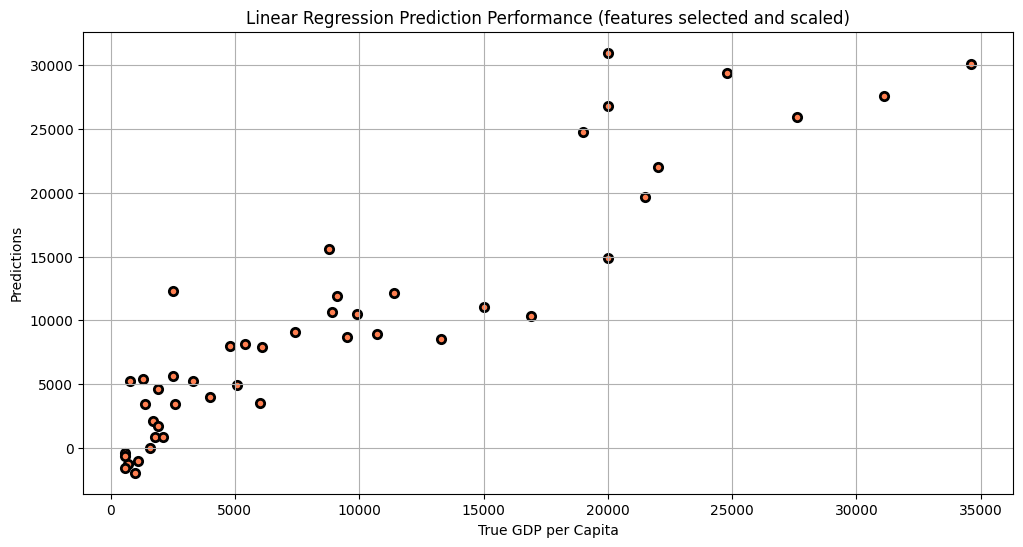

In [26]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

In [27]:
error=abs(lm4_pred-y4_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY- (with selected features and feature scaling) \n',round(accuracy,2),'%')

ACCURACY- (with selected features and feature scaling) 
 8.2 %


In [28]:
error=abs(lm1_pred-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY- (without selected features and feature scaling)\n',round(accuracy,2),'%')

ACCURACY- (without selected features and feature scaling)
 -7100.93 %


From the metrics above, it is clear that feature selection is essintial for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance.
we got decent prediction performance from LR with feature selection and scaling.

## SVM

##### Model Training

In [29]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

##### Predictions

In [30]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

##### Evaluation

SVM Performance:

all features, No scaling:
MAE: 7049.984895264721
RMSE: 9811.73631340298
R2_Score:  -0.16510345624387246

all features, with scaling:
MAE: 7042.737596769212
RMSE: 9800.406046613498
R2_Score:  -0.16241416444556656

selected features, No scaling:
MAE: 7047.711927073501
RMSE: 9807.997922107874
R2_Score:  -0.16421578810668724

selected features, with scaling:
MAE: 7040.043820847137
RMSE: 9794.58886537642
R2_Score:  -0.1610346364957338


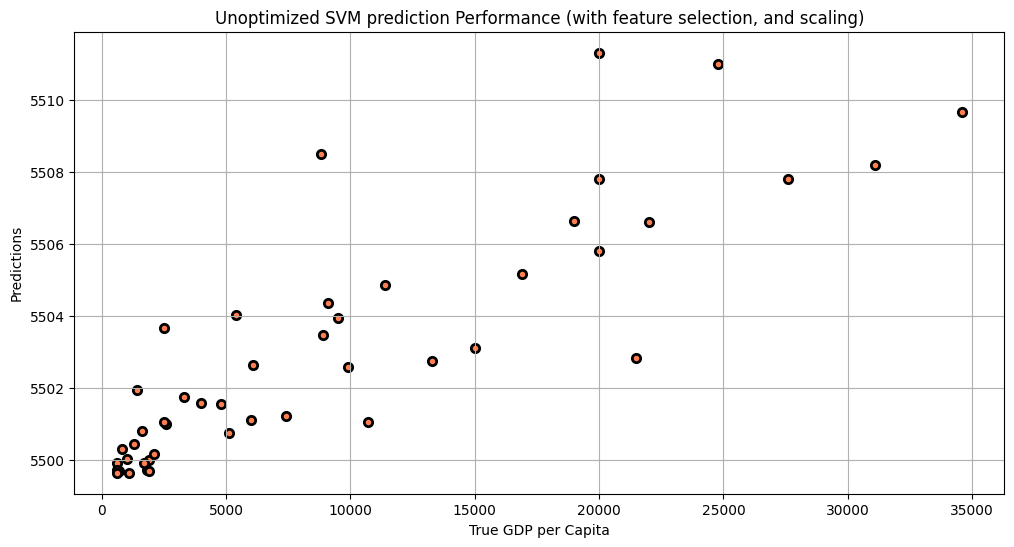

In [31]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

In [32]:
error=abs(svm1_pred-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY-(Without feature scaling and selecting)\n ',round(accuracy,2),'%')

ACCURACY-(Without feature scaling and selecting)
  -77.83 %


In [33]:
error=abs(svm4_pred-y4_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY-(With feature scaling feature selecting)\n ',round(accuracy,2),'%')

ACCURACY-(With feature scaling feature selecting)
  -77.87 %


Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm. 

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

##### Optimizing SVM

In [34]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [35]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.324 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.158 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.117 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.373 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [37]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [38]:
grid_predictions = grid.predict(X4_test)

MAE: 6386.413128432553
RMSE: 9133.499345710767
R2_Score:  -0.009594923559210988


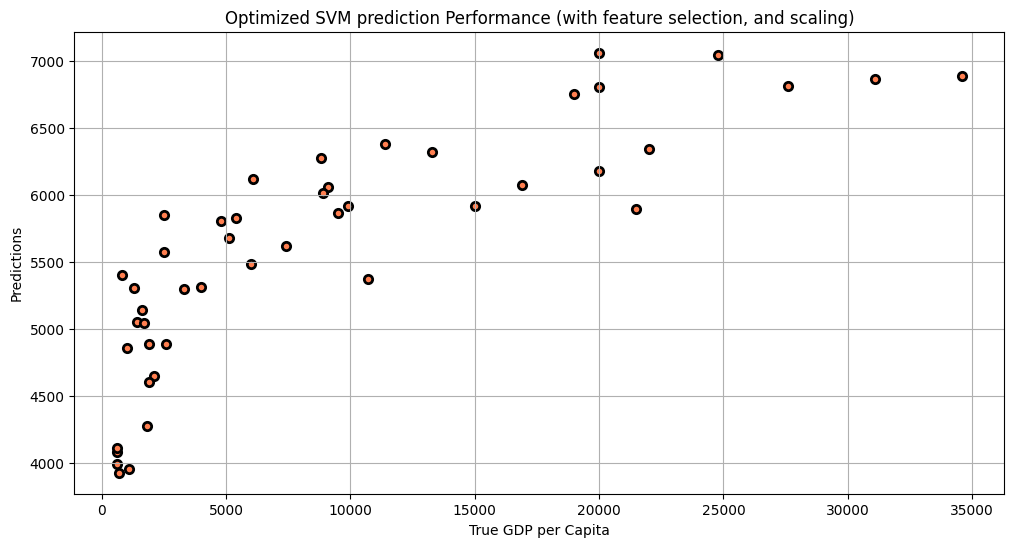

In [39]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

In [40]:
error=abs(grid_predictions-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY (After optimiztion)\n ',round(accuracy,2),'%')

ACCURACY (After optimiztion)
  -44.06 %


SVM has improved a little with grid search, but it still performs below linear regression.

## Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling is not going to be tested for Random Forest, since it should not affect this algorithm's performance. later we will try to improve its performance.

##### Training

In [41]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=101)

##### Prediction

In [42]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

##### Evaluation

Random Forest Performance:

all features, No scaling:
MAE: 2142.1304347826085
RMSE: 3097.1944738255706
R2_Score:  0.8839060185534444

selected features, No scaling:
MAE: 2416.0652173913045
RMSE: 3533.590316058036
R2_Score:  0.8488858452472634


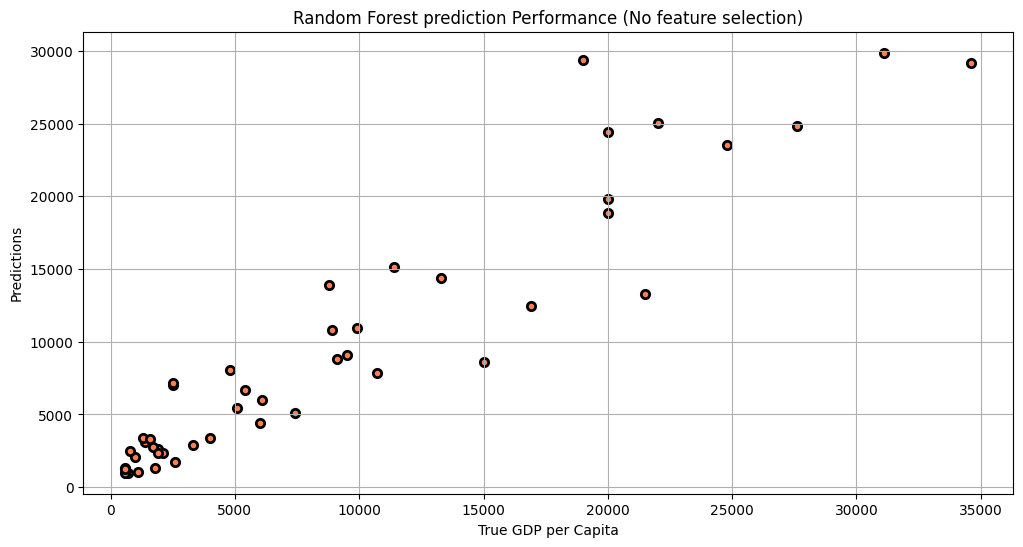

In [43]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()


Calculating the accuracy of the model

In [44]:
error=abs(rf1_pred-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY- ',round(accuracy,2),'%')

ACCURACY-  52.26 %


##### Optimization

We will use grid search in order to obtain good parameters for our RF regressor. The parameters we will optimiz are: 

* n-estimators 
* min_samples_leaf
* max_features
* bootstrap

In [45]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]} 

In [46]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [47]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]})

In [48]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [49]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000)

In [50]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 2262.2652173913043
RMSE: 3143.2452544408966
R2_Score:  0.8804280556645658


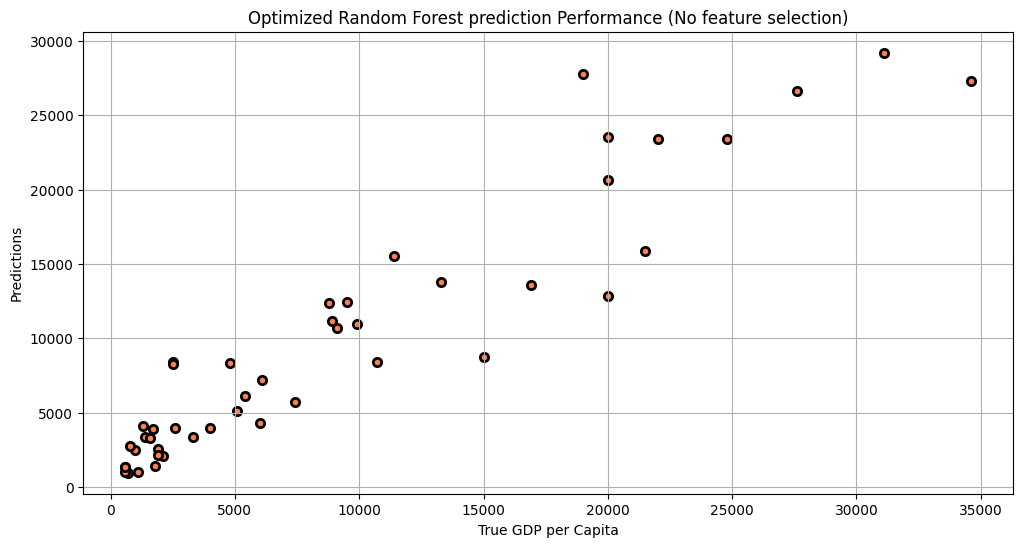

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

In [52]:
error=abs(rf_grid_predictions-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY- (After Optimization)\n ',round(accuracy,2),'%')

ACCURACY- (After Optimization)
  45.32 %


## Gradient Boosting

Training

In [53]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

Prediction

In [54]:
gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

Evaluation

Gradiant Boosting Performance:

all features, No scaling:
MAE: 2280.4625959347395
RMSE: 3413.6352435789836
R2_Score:  0.8589714692004253

selected features, No scaling:
MAE: 2467.2081266874507
RMSE: 3789.2979753946875
R2_Score:  0.8262238105475073


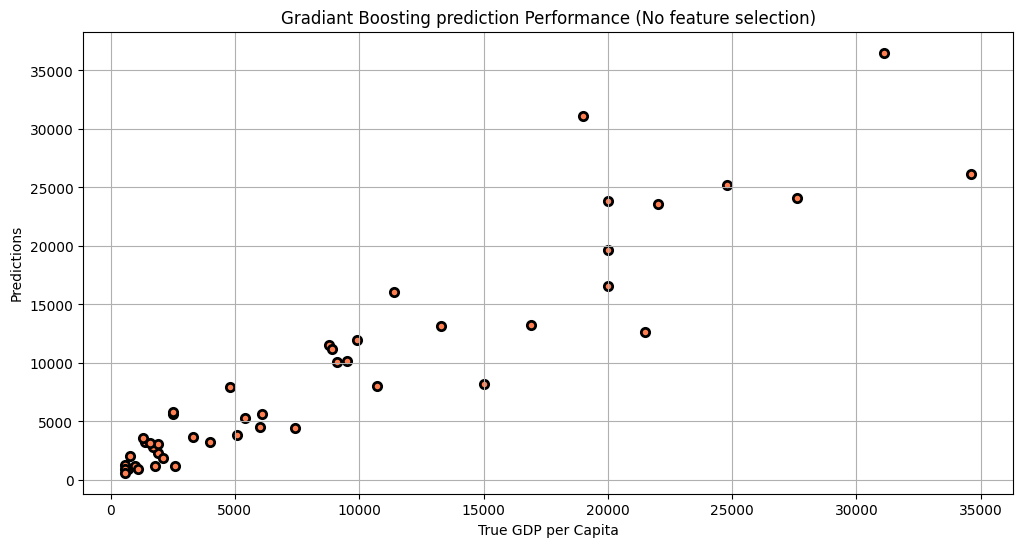

In [55]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

In [65]:
error=abs(gbm3_pred-y3_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY-  \n ',round(accuracy,2),'%')

ACCURACY-  
  54.1 %


It is clear that Gradiant Boosting gave us good performance even before optimization. Its performance on our dataset is very close to that of Random Forest. 

##### Feature Importance

We can plot how the GBM regressor sees the importance of different features in the dataset. 

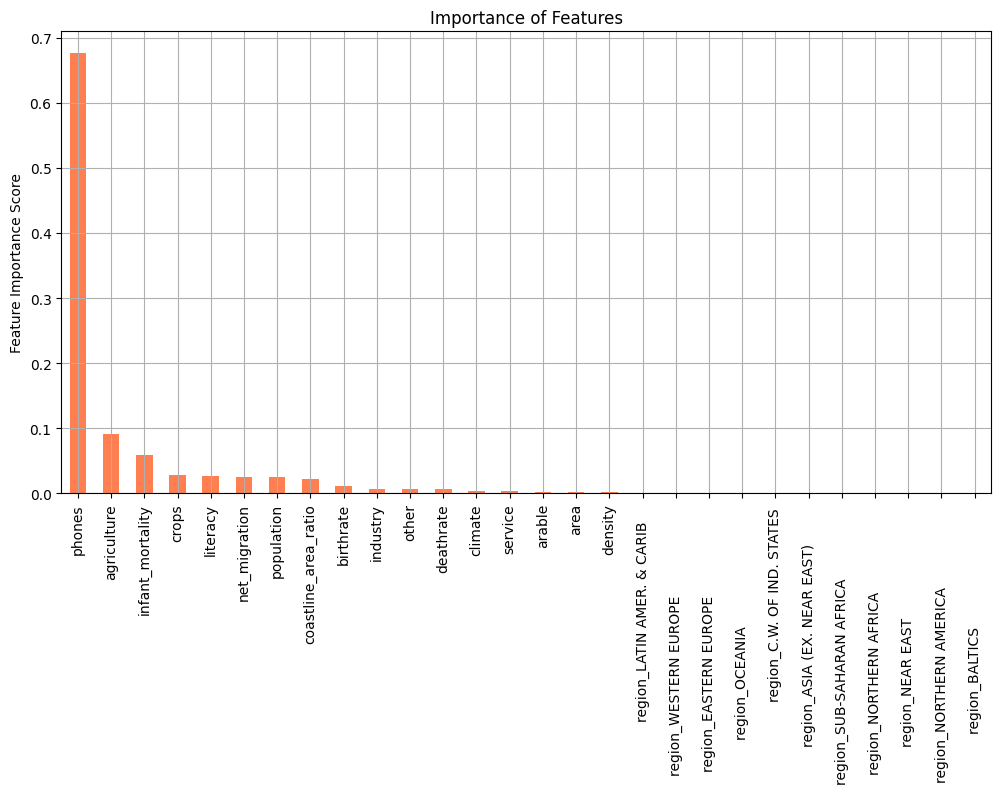

In [57]:
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

The number of phones seems to have the highest predictive power.

With this first model, we obtain an R2_Score of 0.8590, which is not very far behind that of Random Forest regressor. Next we will try to optimize GBM, and compare its performance to that of Random Forest and the one above. Also, we will plot the feature importance chart, and observe if GBM changed the features importance score after optimization. 

##### GBM Optimization


We will use grid search in order to obtain good parameters for our GBM regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

* n-estimators: 100, 500, 1000
* learning_rate: 0.001, 0.01, 0.1, 1
* max_depth: 3, 5, 8
* subsample: 0.7, 1 (Values lower than 1 generally lead to a reduction of variance and an increase in bias)
* min_samples_leaf: 1, 20
* min_samples_split: 0.5-1% of our data --> we have 227 datapoints --> 10 -20
* max_features: 4, 7 (sqrt of number of features is a good guess) 


In [58]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}


In [59]:
gbm_grid_predictions = gbm_tuning.predict(X_test)

MAE: 2362.9354066125907
RMSE: 3469.360881371261
R2_Score:  0.8543294671599899


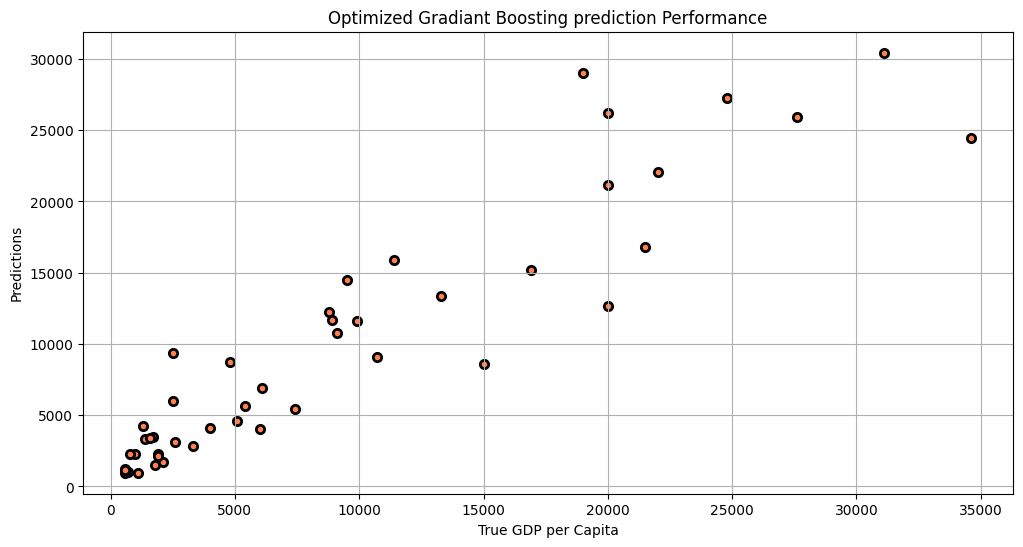

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

In [64]:
error=abs(gbm_grid_predictions-y_test)
#mean absolute percentage error
mape=100*(error/y_test)
accuracy= 100-np.mean(mape)
print('ACCURACY- (After Optimization)\n ',round(accuracy,2),'%')

ACCURACY- (After Optimization)
  48.55 %


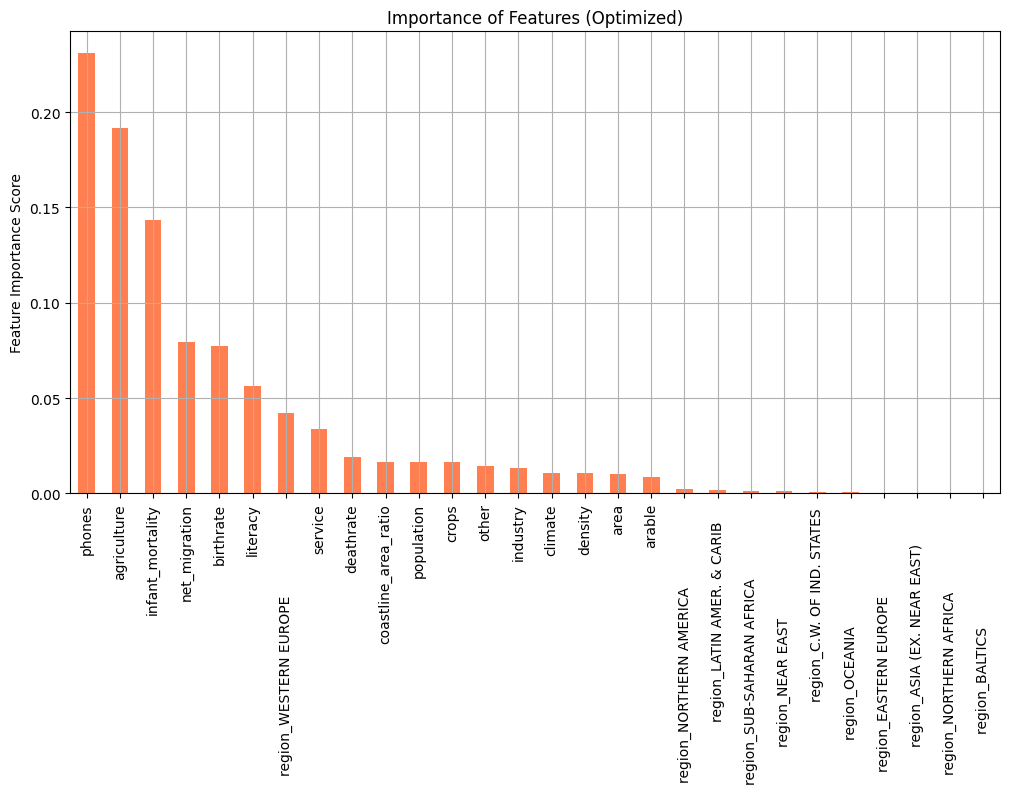

In [61]:
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1, 
                                    subsample=0.7,max_features=7, random_state=101)
gbm_opt.fit(X_train,y_train)
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

We can see that the grid search actually decreased the GBM performance a bit, the reason is that we could not extend the grid search limits, due to processing limits. Yet, we can notice that grid search resulted in a different features importance scores. In general, we can say that GBM has a similar performance to that of Random Forest on our dataset. 

## Conclusion

In this project, we used countries_of_the_world dataset to build a __GDP__ predictor. 4 different learning regressors (Linear Regression, SVM, Random Forest, and Gradiant Boosting) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then Linear Regression, while SVM acheived the worst performance of the 4.

The best prediction performance was acheived using __Random Forest__ regressor, using all features in the dataset, and resulted in the following metrics: 
* Mean Absolute Error __(MAE)__: 2142.13
* Root mean squared error __(RMSE)__: 3097.19
* R-squared Score __(R2_Score)__:  0.8839

Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD. 